# STAT 301: Individual Assignment 3

**Group:** 26

**Group member:** Sam Thorne 83910448

## New York City Airbnb Data

Data was originally retrieved from [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data). Raw data can be found on [GitHub](https://raw.githubusercontent.com/samnthorne/FinalProject/main/data/AB_NYC_2019.csv). 

This dataset is a summary of Airbnb information in the New York City area during 2019. The data includes review information, host metrics, general metrics about the Bnb, and booking information. This is a public dataset that can be found on [insideairbnb.com](http://insideairbnb.com/).

### Descriptive Summary:

**New York City Airbnb Dataset** has 16 attributes describing various Airbnbs throughout the New York City area in 2019. There are 48895 different Airbnb's presented in this data set. 

**Data Attribute Summary:**

|Name of attribute|Type of data|Semantics|Notes|
|---|---|---|---|
|`id`|Quantitative `dbl`|There is a unique value in each of these columns, id is essentially the index for the row|Unique value for each row, does not start at `0`.|
|`name`|Categorical variable `chr`|This is the name of the BnB that the row is about.|There are `47895` unique values in this column. Meaning it is not unique throughout the whole data set.|
|`host_id`|Quantitative variable `dbl`|This is the numerical ID for the BnB host for the row|`37457` different values in this column ranging from `2438` to `274321313`|
|`host_name`|Categorical variable `chr`|Name of the host in charge of the Bnb for the row|`11453` unique values in this row. The names are mainly just the first name of the Bnb host.|
|`neighbourhood_group`|Categorical variable `chr`|The neighbourhood are grouped together in this data. These are general community groupings in the New York area|There are 5 unique values in this column. These values include: `Brooklyn`, `Manhattan`, `Queens`, `Staten Island` and `Bronx`.|
|`neighbourhood`|Categorical variable `chr`|This is the neighbourhood in New York the Airbnb can be found in|There are 221 unique values in this column. They are represented as strings where each word begins with a capital.|
|`latitude`|Quantitative variable `dbl`|This is the latitude location of the BnB represented in each row|Ranges from `40.50` to `40.91`. All within the New York area.|
|`longitude`|Quantitative variable `dbl`|This is the longitude of the Bnb represented in each row|Ranges from`-74.24` to `73.71`|
|`room_type`|Categorical variable `chr`|This is the type of room at you can rent out through each Bnb|Has 3 unique values. These values include: `Private room`, `Entire home/apt`, and `Shared room`.|
|`price`|Quantitative variable `dbl`|This is how much is costs to stay with each Airbnb for a single night|Ranges from `0.0` to `10000.0`. All values are a rounded whole number.|
|`minimum_nights`|Quantitative variable `dbl`|This is the minimum amount of nights someone must book to stay at this bnb.|Ranges from `1.00` to `1250.0`, all values are rounded whole numbers.|
|`number_of_reviews`|Quantitative variable `dbl`|This is the number of reviews this Airbnb recieved prior to this study|Ranges from `0.0` to `629.00`. All values are whole numbers.|
|`last_review`|Date `date`|This is the day that the last review (prior to this study) was posted.|Values range from `2011`, to `2019`. There are also `10052` NA values in this column.|
|`reviews_per_month`|Quantitative variable `dbl`|This is the average number of reviews the Bnb recieves each month|Ranges from `0.010` to `58.5`. With a mean of `1.373` reviews each month.|
|`calculated_host_listings_count`|Quantitative variable `dbl`|This is the number of other Airbnbs this host runs.|Ranges from `1` to `327`. Most of this column is made up of 1's (the host runs only one bnb and it is the bnb represented in that row.|
|`availability_365`|Quantitative variable `dbl`|This is the number of days available for booking (not yet booked when data was collected).|Ranges from `0` to `365`. The average amount of days available is `112`.|

<span style = "color: gray;"> **Table 1:** Descriptive summary of all attributes in the New York City AirBnb dataset</span>

### ***Question of interest from Assignment1:***
> *Using the location, availability, room type, & host information, how much should a single night stay at the Airbnb cost?*

This question is aimed towards new Airbnb hosts who are unsure about how much a stay at their bnb should cost. My goal is to build a predictive model that will predict an appropriate price for a nights stay at an Airbnb based on the variables listed above.

## Reading the data in using R:

To run this notebook `tidyverse` must be installed. The data set is being read in from [GitHub](https://raw.githubusercontent.com/samnthorne/FinalProject/main/data/AB_NYC_2019.csv) despite originally being found on [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data).

In [10]:
# loading necessary libraries:
library(tidyverse)

<span style = "color: gray;"> **Table 2:** First few rows of entire New York City AirBnb Data</span>

**Data dimensions:**

In [3]:
print(paste("The data set has dimensions of",dim(data)[1], "by", dim(data)[2]))

[1] "The data set has dimensions of 48895 by 16"


## Data Cleaning

This data set is quite clean to begin with. It is already in long format for building the model and the visualizations below. The data cleaning completed here will largely be condensing the data down to what is going to be used for the analysis. I will also be re-labelling many of the `chr` variables as `fct` variables.

### Dropping attributes:

As discussed in Assignment1 I am going to be dropping columns `id`, `host_id`, `neighbourhood`, `latitude`, `longitude`, `number_of_reviews`, `last_review`, and `reviews_per_month`. 
- The `id` and `host_id` column do not have any semantic meaning so I chose to drop them. Neither of these attributes should not alter my ability to predict an appropriate AirBnb price due to all the values in these columns being arbitrary.
- The columns `neighbourhood`, `latitude`, and `longitude` all have to do with the location of the Bnb. I am leaving the column `neighbourhood_group` to represent the location of the Bnb and dropping these columns to avoid multi-collinearity in the model. Each of these variables share semantic meaning and I feel only one attribute should remain.
- The columns `number_of_reviews`, `last_review`, and `reviews_per_month` all have to do with reviews each bnb has recieved. I decided to drop these columns as this relates to the number of reviews only; there is no sentiment of these reviews represented in this data. People have a tendency to leave reviews when they need to vent or if they are giving praise after a positive experience. These two extremes are represented in the same way when only looking at review numbers. To avoid these columns nullifying the models predictions they are all going to be dropped.

Additionally, I hope to test if the attribute `name` benefits the prediction model or not. I will complete this analysis when building the model for Assignment 3. I am unsure about how this attribute is going to effect the model because it is a natural language text column. Without natural language processing I am quite certain that this attribute will not aid the model very much.

In [4]:
# dropping columns I am not using:

data <- data %>%
    select(-id, -host_id, -neighbourhood, -latitude, -longitude, -number_of_reviews, -last_review, -reviews_per_month)
head(data)

name,host_name,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Clean & quiet apt home by the park,John,Brooklyn,Private room,149,1,6,365
Skylit Midtown Castle,Jennifer,Manhattan,Entire home/apt,225,1,2,355
THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Private room,150,3,1,365
Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Entire home/apt,89,1,1,194
Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,Entire home/apt,80,10,1,0
Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Entire home/apt,200,3,1,129


<span style = "color: gray;"> **Table 3:** First 5 rows of shrunken New York City AirBnb data</span>

### Removing Na values:

During assignment 1, I found there were a few columns that contained null values. These columns included `last_review` and `reviews_per_month`. Each of these columns were dropped for this analysis for reasons described above. I am going to double check if there are any other any other columns with NA values:

In [5]:
# find NA values and drop those columns?

NA_values <- tibble(Attribute = c("Name", "Host name", "Neighbourhood group", "Room type", "Price", "Minimum nights", "Number of host listings", "Availability"),
                    NAs = c(sum(is.na(data$name)), sum(is.na(data$host_name)), sum(is.na(data$neighbourhood_group)), sum(is.na(data$room_type)), sum(is.na(data$price)), sum(is.na(data$minimum_nights)), sum(is.na(data$calculated_host_listings_count)), sum(is.na(data$availability_365)))
                    )
NA_values

Attribute,NAs
<chr>,<int>
Name,16
Host name,21
Neighbourhood group,0
Room type,0
Price,0
Minimum nights,0
Number of host listings,0
Availability,0


<span style = "color: gray;"> **Table 4:** Number of NA values remaining in the condensed New York City Airbnb data</span>

***What to do with these few NA values?***

There are a few NA values found in both `name` and `host_name` in this data set. 

This is a small number of null values in the data being used. To complete this analysis, any rows containing NA values are going to be dropped for simplicity. This makes up only 0.07% of the total rows in the data so dropping these few rows does not drastically alter the size of the sample being assessed.

In [6]:
# Dropping rows containing NA values.

data <- na.omit(data)
print(paste("Without NA values the dimensions of the data are", dim(data)[1], "by", dim(data)[2]))

[1] "Without NA values the dimensions of the data are 48858 by 8"


### Changing `chr` to `fct`:

For some of the categorical variables in this data set (`neighbourhood_group`, `room_type`) there are several distinct categories represented in the column. These variables have a fixed, known set of possibilities that are always going to be the same. 

The columns `name` and `host_name` are also categorical but these columns do not have a fixed set of possible values. New data can, and likely would, have completely different values in these columns so I will be leaving these columns as `chr` type.

In [7]:
data$neighbourhood_group <- as.factor(data$neighbourhood_group)
data$room_type <- as.factor(data$room_type)

## Exploratory Data Analysis:

Before beginning my visualization I am going to be doing some exploratory analysis to determine which attributes should be further visualized using said visualization.

### Attribute Summary:

In [8]:
summary(data)

     name            host_name            neighbourhood_group
 Length:48858       Length:48858       Bronx        : 1089   
 Class :character   Class :character   Brooklyn     :20089   
 Mode  :character   Mode  :character   Manhattan    :21643   
                                       Queens       : 5664   
                                       Staten Island:  373   
                                                             
           room_type         price         minimum_nights    
 Entire home/apt:25393   Min.   :    0.0   Min.   :   1.000  
 Private room   :22306   1st Qu.:   69.0   1st Qu.:   1.000  
 Shared room    : 1159   Median :  106.0   Median :   3.000  
                         Mean   :  152.7   Mean   :   7.012  
                         3rd Qu.:  175.0   3rd Qu.:   5.000  
                         Max.   :10000.0   Max.   :1250.000  
 calculated_host_listings_count availability_365
 Min.   :  1.000                Min.   :  0.0   
 1st Qu.:  1.000                1s

A couple points to note about the above summary:
- The categorical level `Staten Island` in the column `neighbourhood_group` has much fewer instances than the other levels seen in this column.
- The categorical level `Shared room` in the column `room_type` also has fewer 

## Visualization:

The goal of this analysis is to determine which variables are most influential when setting a price for a nights stay at an Airbnb. The below visualization explores the any relationships price may have with other attributes regarding the Airbnb. This visualization is going to focus on the `room_type`, and `neighbourhood_group` in relation to the price of a single nights stay. 

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 11 rows containing non-finite values (`stat_boxplot()`).”


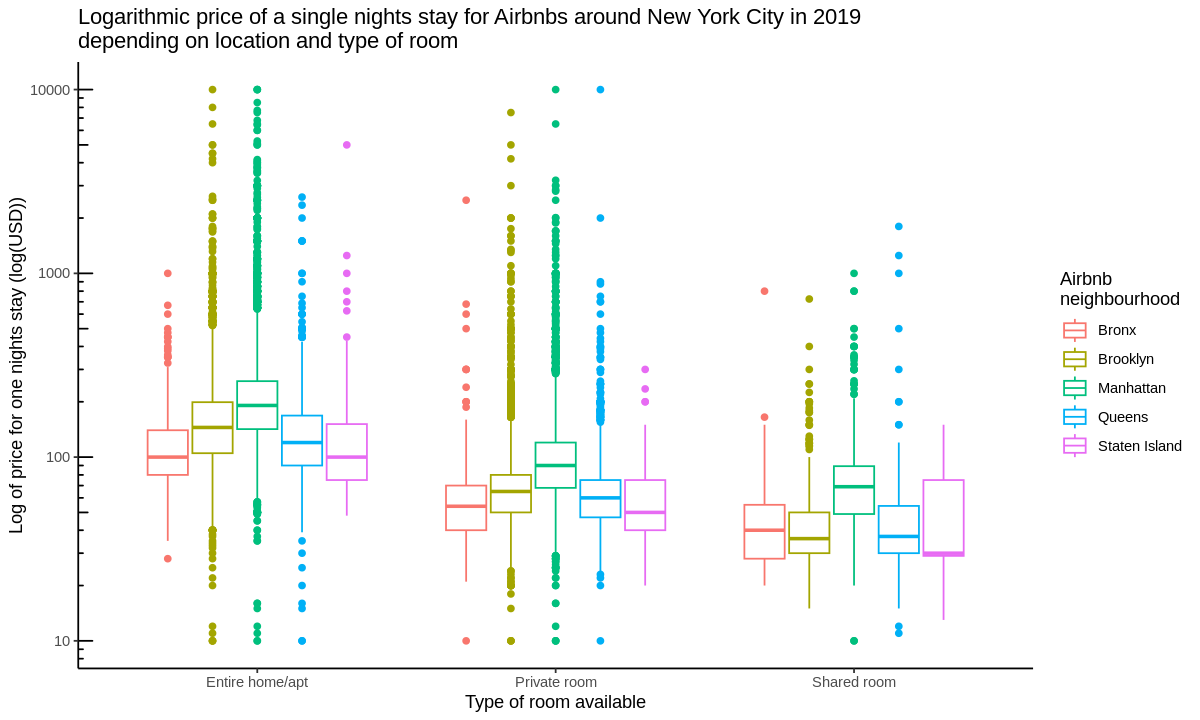

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)

visualization <- data %>%
    ggplot(aes(color = neighbourhood_group, 
               y = price, 
               x = room_type))+
    geom_boxplot() +
    scale_y_log10() + # to better see the variation in data at lower numbers. 
    annotation_logticks(10, sides = "l", colour = 'black', scaled = TRUE) +
    ggtitle("Logarithmic price of a single nights stay for Airbnbs around New York City in 2019 \ndepending on location and type of room") +
    labs(y = "Log of price for one nights stay (log(USD))",
         x = "Type of room available") +
    scale_color_discrete(name = "Airbnb \nneighbourhood") +
    theme_classic()

visualization
# ggsave('images/Assignment2-Vis.png', plot = visualization)

<span style = "color: gray;">**Figure 1:** Distribution of log(price) based on room type and neighbourhood from New York City Airbnb data. </span>

**Justification for chosen visualization:**

Boxplots are able to show large amount of information in a way that is quite easy to interpret. From this visualization one can find the mean and quantile ranges of price for each room type - neighbourhood combination of Airbnbs. 

I chose to display the visualization with a logarithmic scale on the y-axis because the price range goes up very high (`max =  10,000`) while the majority of the points were quite a bit lower (`mean =152.7`). Using a logarithmic scale on the y-axis enables the viewer to analyze the relationships between the variables at lower price points that could be too condensed together to see on an unscaled visualization.

**Interpretation of Figure 1:**

Relationship between room type and Airbnb price:
- To stay at a `Entire home/apt` costs substantially more per night than staying in a `Private room` or a `Shared room`
- Staying in a `Private room` is also substantially more costly than staying in a `Shared room`.
- `Entire home/apt` has much more variability in its pricing than the other two room types. It does not look as substantial using the logarithmic scale but there are Airbnb prices ranging from ~10,000 USD to ~10 USD per night. 

Relationship between neighbourhoods and Airbnb price:
- The average cost to stay in an Airbnb in Manhattan is higher than any other neighbourhood no matter the type of room. 
- The least costly neighbourhood is `Staten Island` no matter the type of room.
- Each neighbourhood follows the same trends discussed in room type (`Entire home/apt` price > `Private room` price > `Shared room` price).

Overall, there are some clear trends between `room_type` and `neighbourhood_group` with `price`. This visualization confirms that these attributes will likely help to predict appropriate Airbnb pricing. Additionally, it provides insight about how the pricing of an Airbnb should change with either room type or neighbourhood.

## Methods and Plan

***Proposed Method:*** 

<span style = "color: purple;">I am trying to generate a predictive model that predicts a continuous variable and uses categorical variables to do so.</span>

<span style = "color: red;">*Propose one method to address your question of interest using the selected dataset and explain why it was chosen. In your explanation respond to the following questions:*</span>
1. <span style = "color:red;">*Why is this method appropriate?*</span>
2. <span style = "color:red;">*Which assumptions are required, if any, to apply the method selected?*</span>
3. <span style = "color:red;">*What are potential limitations or weaknesses of the method selected?*</span>
